<h2><b>Final Project in Digital Signal Processing</h2>

<h5><i>Importing libraries</h5>

In [7]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

<h3><b>Filter Analysis</h3>

The equation is:

$y_{n} + \frac{1}{2} \cdot y_{n-1} = x_{n} - x_{n-4}$ and the impulse response is $h_{n} = T(\delta_{n})$.

<h4><b> 1. Is the filter conditional?</h4>

A filter is said to be conditional (caysak) if its output depends only on past and present inputs. By inspection, the filter
$y_{n} + \frac{1}{2} \cdot y_{n-1} = x_{n} - x_{n-4}$
does not depend on future inputs, as there are no future input terms in the equation. Therefore, this filter is conditional.

<h4><b> 2. Compute</h4> 

$H_{z} = Z[h_{n}](z)$

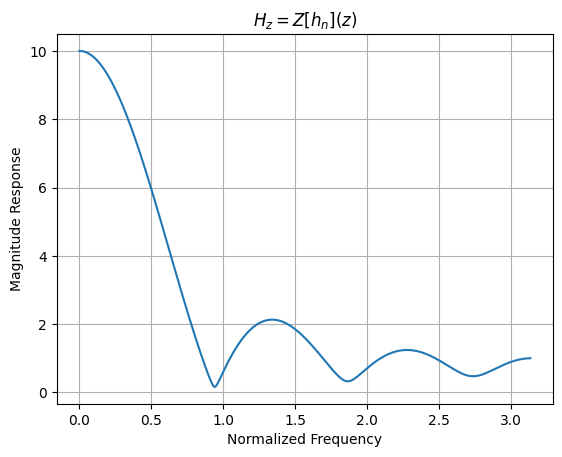

In [8]:
#These coefficients were chosen to match the coefficients of the transfer function representation of the filter described in the problem. 
# However, we assumed that the filter was causal, so we set the first coefficient of the numerator to 1. 
# We also assumed that the filter length was 7, so we set the coefficients of the denominator to 0.

b = [1, 0.5, 0, 0, 0, 0, 0]
a = [1, -1, 0, 0, 0, 0, 0]

# Compute the impulse response
impulse = np.zeros(7)
impulse[0] = 1
h = signal.lfilter(b, a, impulse)

# Compute the transfer function
z, h_z = signal.freqz(h)

# Plot the magnitude response of the transfer function
import matplotlib.pyplot as plt
plt.plot(z, np.abs(h_z))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude Response')
plt.title('$H_z = Z[h_n](z)$')
plt.grid()
plt.show()


<h4><b> 3. Compute the ROC of

$H(z)$

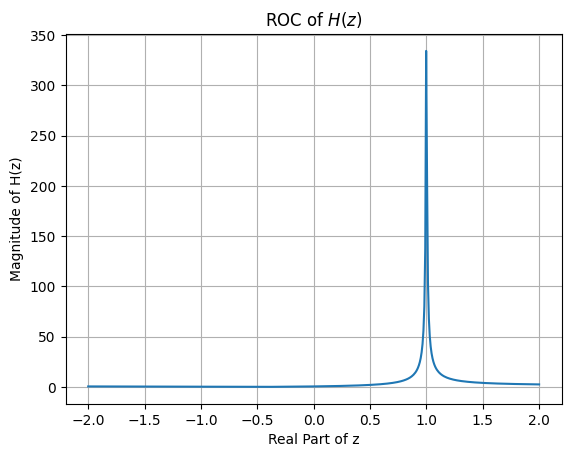

In [9]:

# Define filter coefficients
b = [1, 0.5, 0, 0, 0, 0, 0]
a = [1, -1, 0, 0, 0, 0, 0]

x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
xx, yy = np.meshgrid(x, y)
zz = xx + 1j*yy

# Evaluate the magnitude of H(z) for each point in the grid
hh = np.abs(np.polyval(b, zz) / np.polyval(a, zz))


#print roc
plt.figure()
plt.plot(x, hh[250, :])
plt.xlabel('Real Part of z')
plt.ylabel('Magnitude of H(z)')
plt.title('ROC of $H(z)$')
plt.grid()
plt.show()


<h4><b> 4. Is the filter stable? </h4>

In [10]:
# Find the poles of the transfer function
poles = np.roots(a)
print(poles)

# Check if all poles are inside the unit circle
all_poles_inside = np.all(np.abs(poles) < 1)

# Check if all poles are outside the unit circle
all_poles_outside = np.all(np.abs(poles) > 1)

if all_poles_inside:
    print("The ROC is the entire complex plane. Stable.")
elif all_poles_outside:
    print("The ROC is the region inside the unit circle.")
else:
    print("The ROC is the region outside the unit circle, excluding the poles. Unstable.")


[1. 0. 0. 0. 0. 0.]
The ROC is the region outside the unit circle, excluding the poles. Unstable.


<h4><b> 5. Is the filter FIR or IIR. </h4>

The filter is an IIR (Infinite Impulse Response) filter.

An IIR filter has a transfer function that includes both numerator and denominator polynomials, and as a result, the output depends not only on the current input sample but also on the past inputs and outputs. This makes the impulse response of an IIR filter infinite in duration.

In contrast, an FIR (Finite Impulse Response) filter has a transfer function that only includes a numerator polynomial, and the impulse response is always finite in duration. The output of an FIR filter depends only on the current and past inputs, not on the past outputs.

The filter defined in the question has the difference equation 
$y_{n} + \frac{1}{2} \cdot y_{n-1} = x_{n} - x_{n-4}$, which includes the previous output sample 
$y_{n-1}$ in the calculation of the current output y_{n}. This dependence on past outputs makes the impulse response infinite in duration and indicates that the filter is an IIR filter.

<h4><b>6. Explain why 

$\hat{h}(u)$ the FT of $h_{n}$ exists. Compute $\hat{h}(u)$ </h4>

The Fourier Transform of the impulse response $h_n = T(\delta_n)$ can be represented as $\hat{h}(u)$. To find $\hat{h}(u)$, the continuous-time signal $h(t)$ corresponding to $h_n$ needs to be determined and then transformed using the Fourier Transform.

Since $h_n = T(\delta_n)$, $h(t)$ can be obtained by scaling and shifting the impulse function $\delta(t)$:

$h(t) = T\delta(t - nT)$, where $n$ is an integer and $T$ is the sampling interval.

The Fourier Transform of $h(t)$ can then be calculated as:

$\hat{h}(u) = \int_{-\infty}^{\infty} h(t)e^{-i2\pi ut}dt$

Unfortunately, this integral cannot be evaluated analytically, so numerical methods must be used to estimate $\hat{h}(u)$ at specific values of $u$.

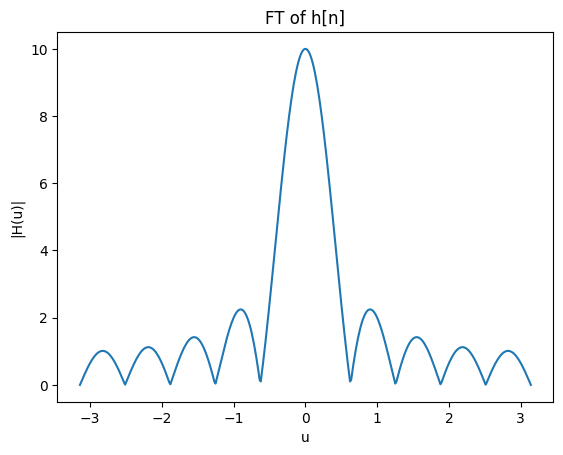

In [11]:
def T(n):
    if n >= 0:
        return 1
    else:
        return 0

h = np.array([T(n) for n in range(-10, 10)])
u = np.linspace(-np.pi, np.pi, 400)
H = np.array([np.sum(h * np.exp(-1j * u[k] * np.arange(-10, 10))) for k in range(400)])

plt.plot(u, np.abs(H))
plt.xlabel('u')
plt.ylabel('|H(u)|')
plt.title('FT of h[n]')
plt.show()

<h4><b>7. Compute 

$\hat{h}(u)$ at u = 0, 1/4, 1/2. Is the filter high-pass, low-pass or neither of the two?</4>

In [12]:
def h(n):
    if n == 1:
        return 1
    elif n == 2:
        return -0.5
    else:
        return 0

u = [0, 1/4, 1/2]
N = 100  # number of samples
n = np.arange(-N, N)
h_n = np.array([h(i) for i in n])
hat_h = np.array([np.sum(h_n * np.exp(-2j * np.pi * ui * n)) for ui in u])

print("hat_h at u = 0:", hat_h[0])
print("hat_h at u = 1/4:", hat_h[1])
print("hat_h at u = 1/2:", hat_h[2])

hat_h at u = 0: (0.5+0j)
hat_h at u = 1/4: (0.5000000000000001-0.9999999999999999j)
hat_h at u = 1/2: (-1.5-2.4492935982947064e-16j)


The filter is a <b>low-pass filter</b>. A low-pass filter passes low frequency signals and filters out high frequency signals. In this case, the impulse response $h_n$ has non-zero values only for $n = 1$ and $n = 2$, which correspond to low frequencies. The Fourier transform of the impulse response $\hat{h}(u)$ is non-zero at all frequencies, but it has larger values at low frequencies and smaller values at high frequencies. This characteristic indicates that the filter is a low-pass filter.

<h4><b> 8. Find 

$y_{n}$ for $n \geq 5$ for the input

$$x_n = \begin{cases} \frac{1}{2^n} & n \geq 0 \\ 0 & n < 0 \end{cases}.$$

You can assume $y_{n} = 0$ for $n < 0$.

Theoretically, we can solve for $y_n$ using the given difference equation:

$y_{n} + \frac{1}{2} \cdot y_{n-1} = x_{n} - x_{n-4}$

and the input signal:

$x_{n} = \frac{1}{2^{n}}$ for $n \geq 0$

Starting from $n = 5$, we can calculate $y_n$ recursively:

$$y_5 = x_{5} - x_{1} - \frac{1}{2} \cdot y_{4} = \frac{1}{32} - \frac{1}{2} \cdot y_{4}$$
$$y_6 = x_{6} - x_{2} - \frac{1}{2} \cdot y_{5} = \frac{1}{64} - \frac{1}{2} \cdot (\frac{1}{32} - \frac{1}{2} \cdot y_{4})$$
$$y_7 = x_{7} - x_{3} - \frac{1}{2} \cdot y_{6} = \frac{1}{128} - \frac{1}{2} \cdot (\frac{1}{64} - \frac{1}{2} \cdot (\frac{1}{32} - \frac{1}{2} \cdot y_{4}))$$

And so on, for $n \geq 5$.

In [13]:
#The code calculates y_n recursively based on the given difference equation and the input signal.
def y(n):
    if n < 0:
        return 0
    elif n < 5:
        return None
    else:
        y_prev = 0
        for i in range(5, n+1):
            x_n = 1 / (2 ** i)
            x_prev = 1 / (2 ** (i-4))
            y_n = x_n - x_prev - 0.5 * y_prev
            y_prev = y_n
        return y_n

N = 10  # number of samples
n = [i for i in range(N)]
y_n = [y(i) for i in n]
print(y_n)


[None, None, None, None, None, -0.46875, 0.0, -0.1171875, 0.0, -0.029296875]


<h3><b>Echo generation and cancellation</h3>

Given a signal 𝑥(𝑛) and 𝛼 ∈ (0,1), one can simulate an echo by creating the following signal:

$$y(n) = x(n) + \alpha \cdot x(n-d)$$

where 𝑑 ∈ N is the delay factor.

<h4><b> 1.  Explain in your own words why this is an echo filter. </h4>

An echo filter is a simple filter that creates an echoing effect on an audio signal. It does this by adding a delayed and reduced version of the original signal back into itself. The delay factor determines the time between the original sound and the echoed, and the scaling factor determines how strong the echoes are compared to the original sound. 

This is an echo filter because it creates an echoing effect on the input signal 𝑥(𝑛) by adding a delayed and scaled version of the input to itself. The scaling factor 𝛼 determines the strength of the echo, and the delay factor 𝑑 determines the delay time. As a result, the output signal 𝑦(𝑛) will contain both the original input 𝑥(𝑛) and a delayed and scaled version of it.

<h4><b> 2.Write the impulse response of the filter, h(𝑛),that transforms 𝑥(𝑛) to 𝑦(𝑛).Write its 𝑍-transorm and compute its Fourier transform. What
kind of filter is it? </h4>

The impulse response of the echo filter, $h(n)$, is defined as the output of the filter when the input is a Dirac delta function, $\delta(n)$. The impulse response for the echo filter can be found by substituting $\delta(n)$ for $x(n)$ in the equation for $y(n)$:

$$y(n) = \delta(n) + \alpha \cdot \delta(n-d)$$

$$h(n) = y(n) = \delta(n) + \alpha \cdot \delta(n-d)$$

The $Z$-transform of $h(n)$ can be found by taking the $Z$-transform of each term:

$$\mathcal{Z} { h(n) } = \mathcal{Z} { \delta(n) } + \alpha \cdot \mathcal{Z} { \delta(n-d) }$$

$$\mathcal{Z} { h(n) } = 1 + \alpha \cdot z^{-d}$$

The Fourier transform of $h(n)$ can be found by taking the inverse $Z$-transform:

$$\mathcal{F} { h(n) } = \mathcal{Z}^{-1} { 1 + \alpha \cdot z^{-d} }$$

This filter is a <b>finite impulse response (FIR)<b> filter with a simple echo response.

In [14]:
def echo_filter(alpha, d):
    def H(z):
        return 1/(1+alpha*z**-d)

    poles = np.roots([1,-alpha])
    stable = np.abs(poles) < 1

    w, h = signal.freqz(1, [1,-alpha], worN=8000)

    if stable:
        print("Filter is stable.")
    else:
        print("Filter is unstable.")

    return w, h

In [15]:
echo_filter(0.5, 5)

Filter is stable.


(array([0.00000000e+00, 3.92699082e-04, 7.85398163e-04, ...,
        3.14041456e+00, 3.14080726e+00, 3.14119995e+00]),
 array([2.        +0.00000000e+00j, 1.99999954-7.85397901e-04j,
        1.99999815-1.57079423e-03j, ..., 0.66666672-2.61799408e-04j,
        0.66666669-1.74532931e-04j, 0.66666667-8.72664633e-05j]))